In [ ]:
from google.colab import files
uploaded = files.upload()

Saving stroke_risk_dataset.csv to stroke_risk_dataset.csv


In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"
import seaborn as sns
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from IPython.display import IFrame
import missingno as msno

In [ ]:
SR = pd.read_csv("stroke_risk_dataset.csv")

In [ ]:
SR.head(5)

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary)
0,0,1,1,1,0,0,0,1,1,1,0,1,1,0,0,54,58.0,1
1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,49,40.5,0
2,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,62,52.0,1
3,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,48,60.0,1
4,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,61,56.5,1


In [ ]:
SR.tail(5)

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary)
69995,1,0,0,0,0,0,0,1,0,1,1,1,0,0,1,18,30.0,0
69996,0,0,0,1,0,1,0,1,0,0,0,1,1,1,0,24,33.0,0
69997,1,1,0,1,1,1,0,0,0,0,1,0,0,0,0,49,45.5,0
69998,0,1,1,1,1,0,0,0,0,0,0,1,1,1,0,45,48.5,0
69999,0,1,0,0,0,0,0,1,1,1,1,1,0,1,0,74,63.0,1


In [ ]:
SR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Chest Pain                      70000 non-null  int64  
 1   Shortness of Breath             70000 non-null  int64  
 2   Irregular Heartbeat             70000 non-null  int64  
 3   Fatigue & Weakness              70000 non-null  int64  
 4   Dizziness                       70000 non-null  int64  
 5   Swelling (Edema)                70000 non-null  int64  
 6   Pain in Neck/Jaw/Shoulder/Back  70000 non-null  int64  
 7   Excessive Sweating              70000 non-null  int64  
 8   Persistent Cough                70000 non-null  int64  
 9   Nausea/Vomiting                 70000 non-null  int64  
 10  High Blood Pressure             70000 non-null  int64  
 11  Chest Discomfort (Activity)     70000 non-null  int64  
 12  Cold Hands/Feet                 

In [ ]:
SR.describe()

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary)
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,0.501871,0.496471,0.498886,0.500100,0.503043,0.500557,0.499186,0.503671,0.500800,0.501943,0.500643,0.499557,0.498871,0.500686,0.499871,54.056429,55.558771,0.649200
std,0.500000,0.499991,0.500002,0.500004,0.499994,0.500003,0.500003,0.499990,0.500003,0.500000,0.500003,0.500003,0.500002,0.500003,0.500004,21.071567,14.300898,0.477224
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,5.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,45.500000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000,55.500000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,66.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,90.000000,100.000000,1.000000


In [ ]:
SR.isnull().sum()

,0
Chest Pain,0
Shortness of Breath,0
Irregular Heartbeat,0
Fatigue & Weakness,0
Dizziness,0
Swelling (Edema),0
Pain in Neck/Jaw/Shoulder/Back,0
Excessive Sweating,0
Persistent Cough,0
Nausea/Vomiting,0


In [ ]:
SR.value_counts()

Chest Pain  Shortness of Breath  Irregular Heartbeat  Fatigue & Weakness  Dizziness  Swelling (Edema)  Pain in Neck/Jaw/Shoulder/Back  Excessive Sweating  Persistent Cough  Nausea/Vomiting  High Blood Pressure  Chest Discomfort (Activity)  Cold Hands/Feet  Snoring/Sleep Apnea  Anxiety/Feeling of Doom  Age  Stroke Risk (%)  At Risk (Binary)
1           0                    0                    1                   0          0                 0                               0                   1                 0                1                    1                            0                0                    1                        87   64.5             1                   3
            1                    0                    1                   0          0                 0                               1                   0                 1                1                    0                            1                1                    0                        58   60.0             1                   3
                                                                          1          1                 0                               0                   1                 1                0                    1                            0                0                    0                        36   49.0             0                   3
0           0                    0                    1                   1          1                 1                               0                   0                 0                1                    0                            1                0                    0                        71   56.5             1                   3
1           0                    0                    0                   0          0                 1                               1                   0                 1                0                    1                            0                1                    1                        49   50.5             1                   3
                                                                                                                                                                                                                                                                                                                                                        ..
0           1                    0                    1                   0          1                 1                               0                   0                 0                0                    1                            1                0                    0                        39   40.5             0                   1
                                                                                                                                                                                                                                                                                                               49   45.5             0                   1
                                                                                                                                                                                                                                                                                                               63   52.5             1                   1
                                                                                                                                                                                                                                                                                      1                        57   54.5             1                   1
1           1                    1                    1                   1          1                 1                               1                   1                 1              

In [ ]:
SR.columns

Index(['Chest Pain', 'Shortness of Breath', 'Irregular Heartbeat',
       'Fatigue & Weakness', 'Dizziness', 'Swelling (Edema)',
       'Pain in Neck/Jaw/Shoulder/Back', 'Excessive Sweating',
       'Persistent Cough', 'Nausea/Vomiting', 'High Blood Pressure',
       'Chest Discomfort (Activity)', 'Cold Hands/Feet', 'Snoring/Sleep Apnea',
       'Anxiety/Feeling of Doom', 'Age', 'Stroke Risk (%)',
       'At Risk (Binary)'],
      dtype='object')

In [ ]:
num_columns = SR.select_dtypes(include=["int64", "float64"]).columns.tolist()
rows, cols = 5, 4
fig = make_subplots(rows=rows, cols=cols, subplot_titles=num_columns)

for i, num in enumerate(num_columns):
    row = (i // cols) + 1
    col = (i % cols) + 1

    fig.add_trace(
        go.Histogram(x=SR[num], name=num),
        row=row, col=col
    )

fig.update_layout(
    title_text="Histograms of Numerical Features",
    height=600, width=1200,
    showlegend=False
)


Output hidden; open in https://colab.research.google.com to view.

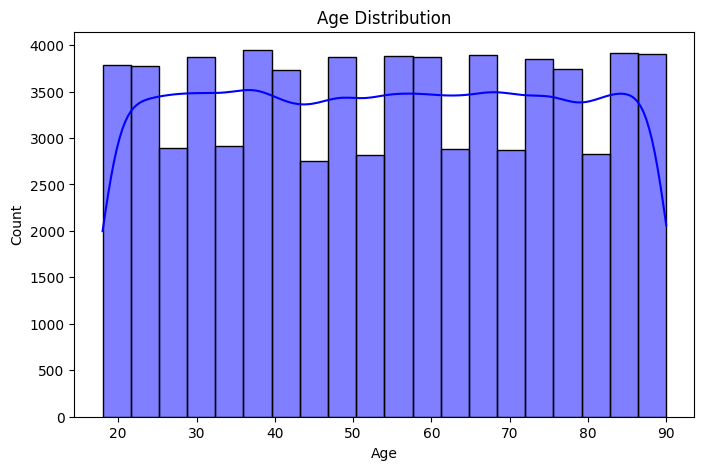

In [ ]:
# Distribution of Age
plt.figure(figsize=(8, 5))
sns.histplot(SR['Age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Count')

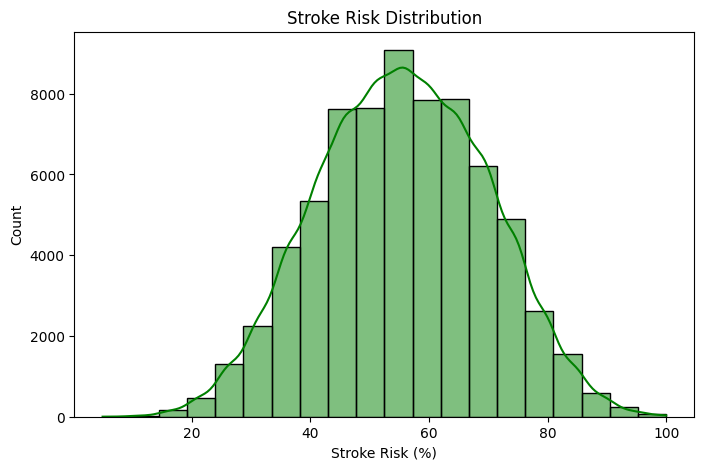

In [ ]:
# Dist of Strock Rise(%)
plt.figure(figsize=(8, 5))
sns.histplot(SR['Stroke Risk (%)'], bins=20, kde=True, color='green')
plt.title('Stroke Risk Distribution')
plt.xlabel('Stroke Risk (%)')
plt.ylabel('Count')

<ipython-input-39-7cac10efef0c>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




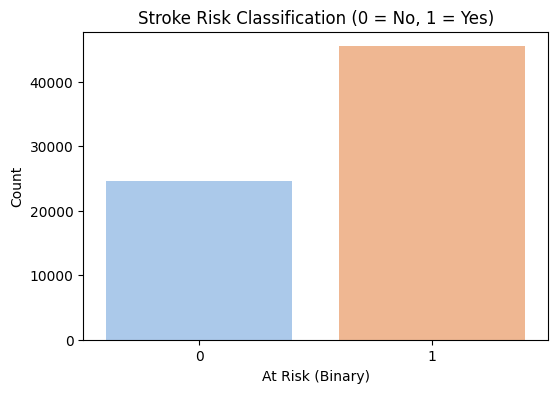

In [ ]:
# Countplot for "At Risk (Binary)" ---
plt.figure(figsize=(6, 4))
sns.countplot(x='At Risk (Binary)', data= SR, palette='pastel')
plt.title('Stroke Risk Classification (0 = No, 1 = Yes)')
plt.xlabel('At Risk (Binary)')
plt.ylabel('Count')
plt.show()

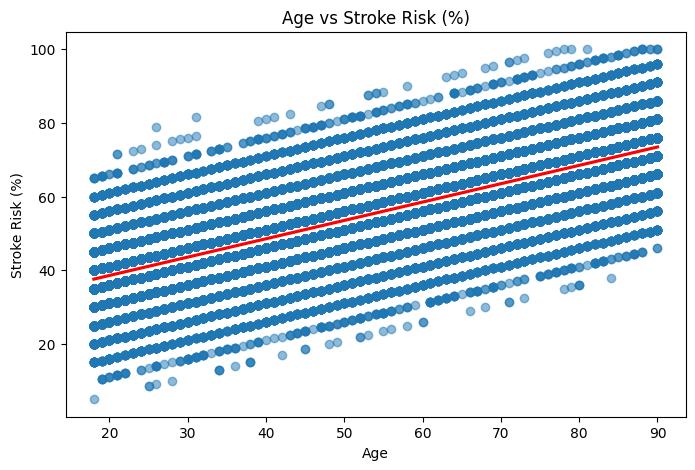

In [ ]:
plt.figure(figsize=(8, 5))
sns.regplot(x='Age', y='Stroke Risk (%)', data=SR, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Age vs Stroke Risk (%)')
plt.xlabel('Age')
plt.ylabel('Stroke Risk (%)')
plt.show()


<Axes: >

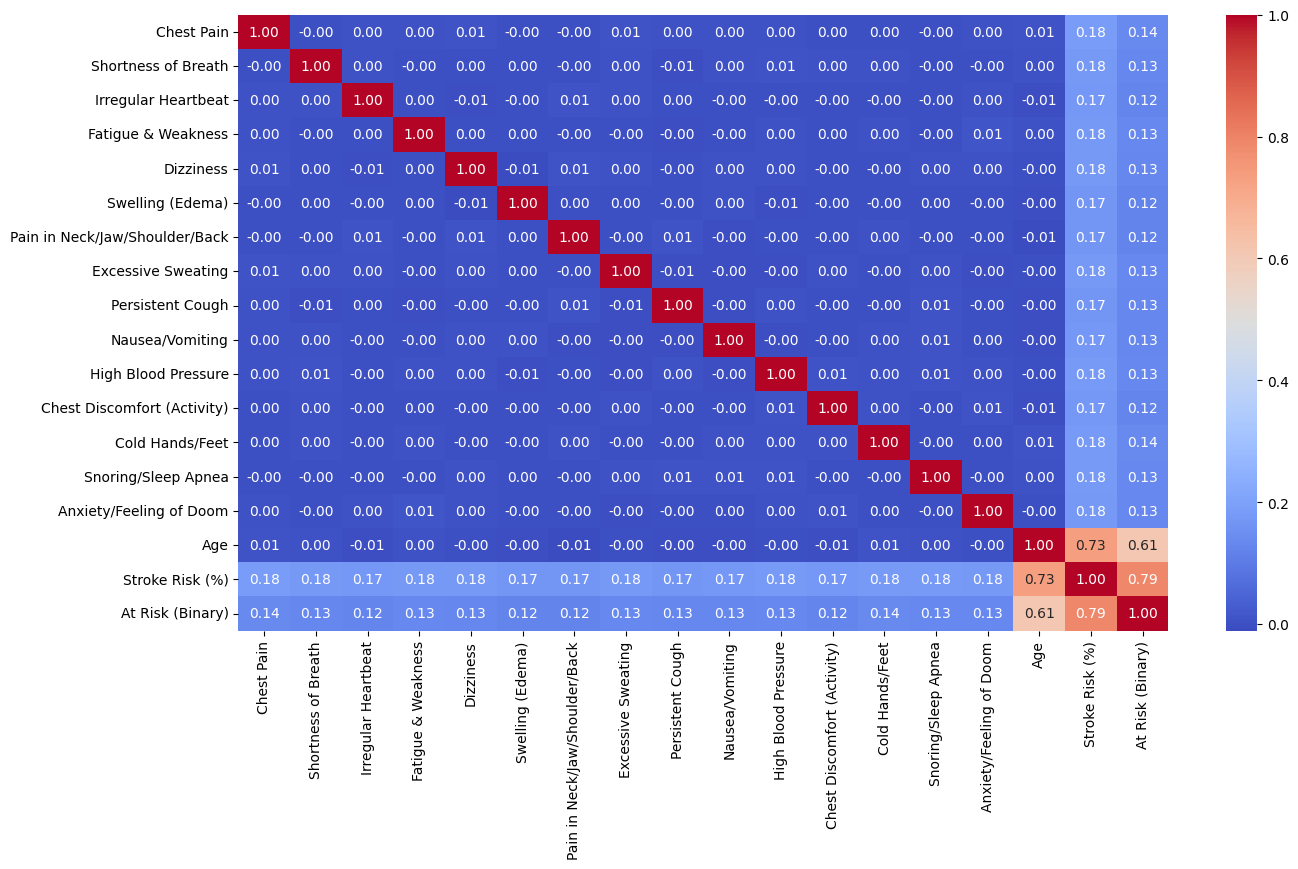

In [ ]:
data = SR[num_columns]
matrix = data.corr()
plt.figure(figsize=(15,8))
sns.heatmap(matrix, cmap="coolwarm", annot=True, fmt=".2f", cbar=True)

<ipython-input-41-63da58dabda3>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-41-63da58dabda3>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-41-63da58dabda3>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-41-63da58dabda3>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-41-63da58dabda3>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and wi

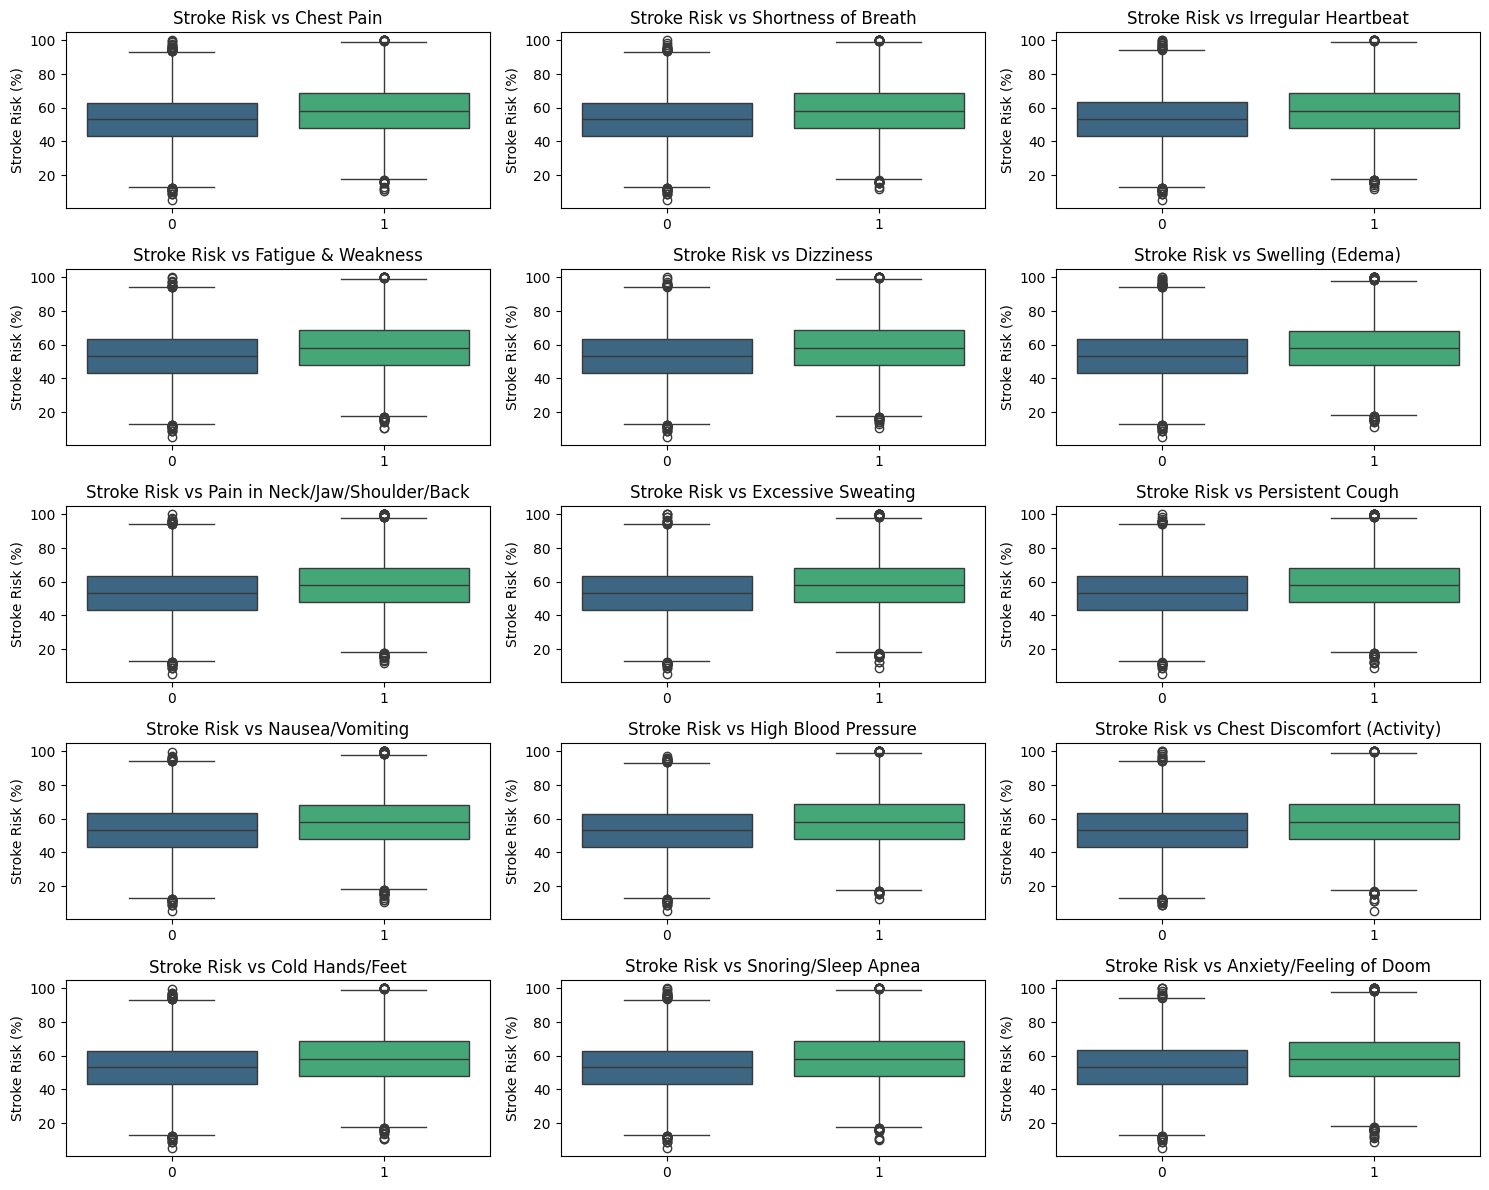

In [ ]:
binary_features = [
    'Chest Pain', 'Shortness of Breath', 'Irregular Heartbeat',
    'Fatigue & Weakness', 'Dizziness', 'Swelling (Edema)',
    'Pain in Neck/Jaw/Shoulder/Back', 'Excessive Sweating',
    'Persistent Cough', 'Nausea/Vomiting', 'High Blood Pressure',
    'Chest Discomfort (Activity)', 'Cold Hands/Feet', 'Snoring/Sleep Apnea',
    'Anxiety/Feeling of Doom'
]

# Plot boxplots for each symptom against Stroke Risk (%)
plt.figure(figsize=(15, 12))
for i, feature in enumerate(binary_features, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(x=feature, y='Stroke Risk (%)', data=SR, palette='viridis')
    plt.title(f'Stroke Risk vs {feature}')
    plt.xlabel("")
    plt.ylabel("Stroke Risk (%)")
plt.tight_layout()
plt.show()

Models


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
# Remove exact duplicate rows
df = SR.drop_duplicates()

# Reset index after removing duplicates
df.reset_index(drop=True, inplace=True)

# Check if duplicates are removed
print(f"Dataset shape after removing duplicates: {df.shape}")

Dataset shape after removing duplicates: (68979, 18)


In [ ]:
# Define features & target
X = SR.drop(columns=["At Risk (Binary)", "Stroke Risk (%)"])  # Drop target columns
y = SR["At Risk (Binary)"]  # Binary classification target

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize numerical features (Age only, since others are binary)
scaler = StandardScaler()
X_train["Age"] = scaler.fit_transform(X_train[["Age"]])
X_test["Age"] = scaler.transform(X_test[["Age"]])

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(),
    "SVM": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

Train Models, Generating Reports & AUC-ROC Curve


 Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4911
           1       1.00      1.00      1.00      9089

    accuracy                           1.00     14000
   macro avg       1.00      1.00      1.00     14000
weighted avg       1.00      1.00      1.00     14000


 Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      4911
           1       0.91      0.91      0.91      9089

    accuracy                           0.88     14000
   macro avg       0.87      0.87      0.87     14000
weighted avg       0.88      0.88      0.88     14000


 Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      4911
           1       0.95      0.97      0.96      9089

    accuracy                           0.95 

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[06:38:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.





 Classification Report for XGBoost:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4911
           1       1.00      1.00      1.00      9089

    accuracy                           1.00     14000
   macro avg       1.00      0.99      1.00     14000
weighted avg       1.00      1.00      1.00     14000

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 36355, number of negative: 19645
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004676 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 104
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.649196 -> initscore=0.615509
[LightGBM] [Info] Start training from score 0.615509


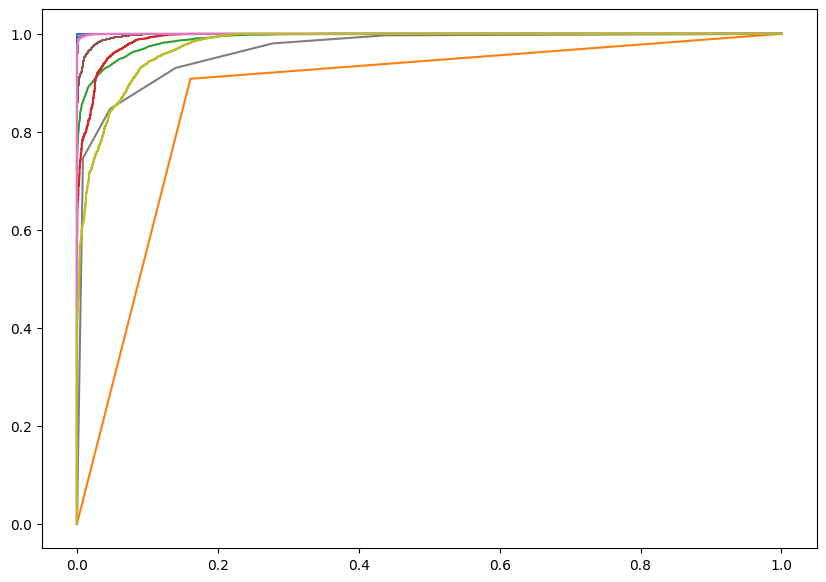

In [ ]:
model_results = {}

plt.figure(figsize=(10, 7))  # Plot for AUC-ROC curves

for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # Probability scores for ROC-AUC

    # Compute Metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    # Save results
    model_results[name] = {"Accuracy": accuracy, "ROC-AUC": roc_auc}

    # Classification Report
    print(f"\n Classification Report for {name}:\n")
    print(classification_report(y_test, y_pred))

    # AUC-ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

<ipython-input-52-e22dfd8d5fb0>:5: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



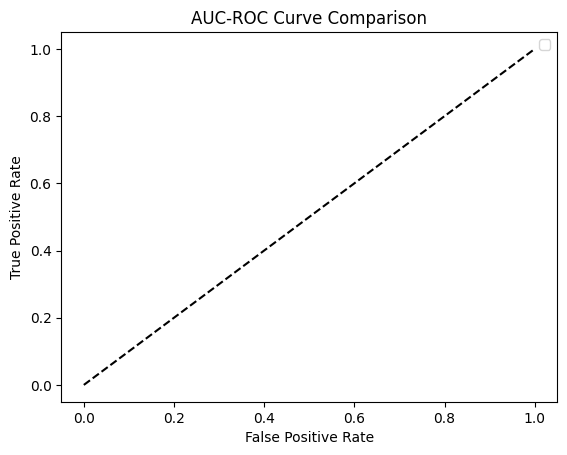

In [ ]:
plt.plot([0, 1], [0, 1], "k--")  # Diagonal line for random model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve Comparison")
plt.legend()
plt.show()

In [ ]:
results_df = pd.DataFrame(model_results).T.sort_values(by="ROC-AUC", ascending=False)
print("\nModel Performance Comparison:\n")
print(results_df)

# Example new patient data (Replace with actual patient values)
new_data = pd.DataFrame({
    "Chest Pain": [1],
    "Shortness of Breath": [1],
    "Irregular Heartbeat": [0],
    "Fatigue & Weakness": [1],
    "Dizziness": [0],
    "Swelling (Edema)": [0],
    "Pain in Neck/Jaw/Shoulder/Back": [1],
    "Excessive Sweating": [0],
    "Persistent Cough": [0],
    "Nausea/Vomiting": [1],
    "High Blood Pressure": [1],
    "Chest Discomfort (Activity)": [1],
    "Cold Hands/Feet": [0],
    "Snoring/Sleep Apnea": [1],
    "Anxiety/Feeling of Doom": [1],
    "Age": [55]  # Replace with a valid age value
})

# Standardize 'Age' column in new data
new_data["Age"] = scaler.transform(new_data[["Age"]])

# Use the best model (highest ROC-AUC) for prediction
best_model_name = results_df.index[0]
best_model = models[best_model_name]
new_prediction = best_model.predict(new_data)
new_proba = best_model.predict_proba(new_data)[:, 1]  # Probability of stroke risk

print(f"\n Prediction for New Patient using {best_model_name}:")
print(f"Stroke Risk: {new_prediction[0]} (1 = At Risk, 0 = Not at Risk)")
print(f"Probability of Stroke Risk: {new_proba[0] * 100:.2f}%")


Model Performance Comparison:

                     Accuracy   ROC-AUC
Logistic Regression  1.000000  1.000000
XGBoost              0.995714  0.999848
SVM                  0.993071  0.999844
LightGBM             0.978357  0.997989
Gradient Boosting    0.960929  0.991867
Random Forest        0.947429  0.991014
Naive Bayes          0.929643  0.977874
K-Nearest Neighbors  0.905643  0.967566
Decision Tree        0.883857  0.873532

 Prediction for New Patient using Logistic Regression:
Stroke Risk: 1 (1 = At Risk, 0 = Not at Risk)
Probability of Stroke Risk: 100.00%
